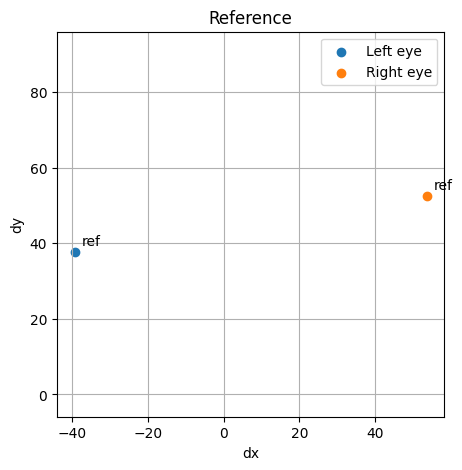

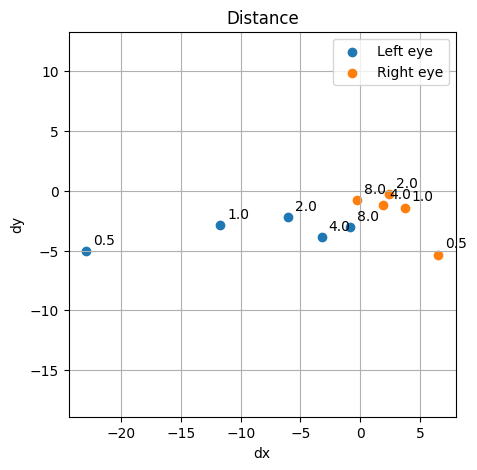

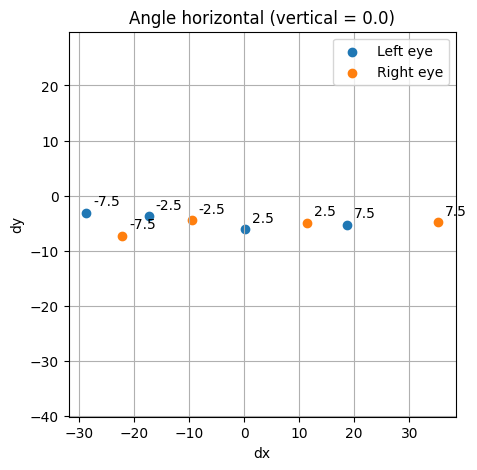

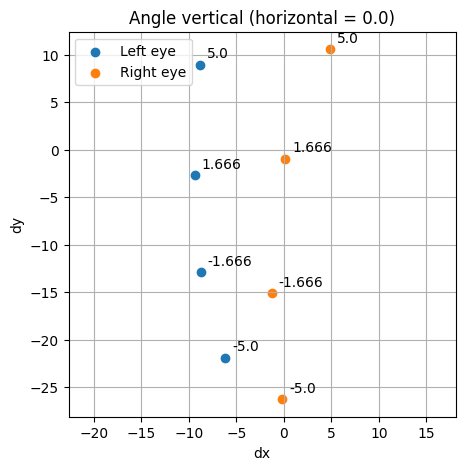

In [4]:
import json
import matplotlib.pyplot as plt

# Path to your original csv file
folder = "/home/VRberry/Public/VR_core/calib_log/"
file_name = "results_"
file_id = "2018"

json_path = f"{folder}{file_name}{file_id}.json"

# Load JSON data
with open(json_path, "r") as f:
    data = json.load(f)

calib = data["calibrator"]

# Helper to extract dx, dy for a given eye from an item
def get_eye_points(item):
    left = item["eye_vectors"]["left_eye_vector"]
    right = item["eye_vectors"]["right_eye_vector"]
    return (left["dx"], left["dy"]), (right["dx"], right["dy"])


# 1) Reference calibrator
ref_item = calib["ref_calibrator"]
(ref_lx, ref_ly), (ref_rx, ref_ry) = get_eye_points(ref_item)

plt.figure(figsize=(5, 5))
plt.scatter(ref_lx, ref_ly, label="Left eye")
plt.scatter(ref_rx, ref_ry, label="Right eye")
plt.title("Reference")
plt.xlabel("dx")
plt.ylabel("dy")
plt.legend()
plt.grid(True)
plt.axis("equal")

# Add text labels for reference: just mark them as "ref"
plt.annotate("ref", (ref_lx, ref_ly), textcoords="offset points", xytext=(5, 5))
plt.annotate("ref", (ref_rx, ref_ry), textcoords="offset points", xytext=(5, 5))

plt.show()


# 2) Distance calibrators (all dist_calibrators)
dist_items = calib["dist_calibrators"]

dist_left_x, dist_left_y = [], []
dist_right_x, dist_right_y = [], []
dist_labels = []  # distance values

for item in dist_items:
    (lx, ly), (rx, ry) = get_eye_points(item)
    dist_val = item["target_position"]["distance"]
    dist_left_x.append(lx)
    dist_left_y.append(ly)
    dist_right_x.append(rx)
    dist_right_y.append(ry)
    dist_labels.append(dist_val)

plt.figure(figsize=(5, 5))
plt.scatter([x - ref_lx for x in dist_left_x], [y - ref_ly for y in dist_left_y], label="Left eye")
plt.scatter([x - ref_rx for x in dist_right_x], [y - ref_ry for y in dist_right_y], label="Right eye")
plt.title("Distance")
plt.xlabel("dx")
plt.ylabel("dy")
plt.legend()
plt.grid(True)
plt.axis("equal")

# Label each point with its distance (8/4/2/1/0.5)
for x, y, d in zip([x - ref_lx for x in dist_left_x], [y - ref_ly for y in dist_left_y], dist_labels):
    plt.annotate(f"{d}", (x, y), textcoords="offset points", xytext=(5, 5))
for x, y, d in zip([x - ref_rx for x in dist_right_x], [y - ref_ry for y in dist_right_y], dist_labels):
    plt.annotate(f"{d}", (x, y), textcoords="offset points", xytext=(5, 5))

plt.show()


# 3) Angle calibrators – HORIZONTAL angles (vertical == 0.0)
angle_items = calib["angle_calibrators"]

horiz_left_x, horiz_left_y = [], []
horiz_right_x, horiz_right_y = [], []
horiz_labels = []  # horizontal values when vertical == 0.0

for item in angle_items:
    tp = item["target_position"]
    if tp["vertical"] == 0.0:
        (lx, ly), (rx, ry) = get_eye_points(item)
        horiz_left_x.append(lx)
        horiz_left_y.append(ly)
        horiz_right_x.append(rx)
        horiz_right_y.append(ry)
        horiz_labels.append(tp["horizontal"])

plt.figure(figsize=(5, 5))
plt.scatter([x - ref_lx for x in horiz_left_x], [y - ref_ly for y in horiz_left_y], label="Left eye")
plt.scatter([x - ref_rx for x in horiz_right_x], [y - ref_ry for y in horiz_right_y], label="Right eye")
plt.title("Angle horizontal (vertical = 0.0)")
plt.xlabel("dx")
plt.ylabel("dy")
plt.legend()
plt.grid(True)
plt.axis("equal")

# Label each point with its horizontal value (-10/-3.5/3.5/10)
for x, y, h in zip([x - ref_lx for x in horiz_left_x], [y - ref_ly for y in horiz_left_y], horiz_labels):
    plt.annotate(f"{h}", (x, y), textcoords="offset points", xytext=(5, 5))
for x, y, h in zip([x - ref_rx for x in horiz_right_x], [y - ref_ry for y in horiz_right_y], horiz_labels):
    plt.annotate(f"{h}", (x, y), textcoords="offset points", xytext=(5, 5))

plt.show()


# 4) Angle calibrators – VERTICAL angles (horizontal == 0.0)
vert_left_x, vert_left_y = [], []
vert_right_x, vert_right_y = [], []
vert_labels = []  # vertical values when horizontal == 0.0

for item in angle_items:
    tp = item["target_position"]
    if tp["horizontal"] == 0.0:
        (lx, ly), (rx, ry) = get_eye_points(item)
        vert_left_x.append(lx)
        vert_left_y.append(ly)
        vert_right_x.append(rx)
        vert_right_y.append(ry)
        vert_labels.append(tp["vertical"])

plt.figure(figsize=(5, 5))
plt.scatter([x - ref_lx for x in vert_left_x], [y - ref_ly for y in vert_left_y], label="Left eye")
plt.scatter([x - ref_rx for x in vert_right_x], [y - ref_ry for y in vert_right_y], label="Right eye")
plt.title("Angle vertical (horizontal = 0.0)")
plt.xlabel("dx")
plt.ylabel("dy")
plt.legend()
plt.grid(True)
plt.axis("equal")

# Label each point with its vertical value (-10/-3.5/3.5/10)
for x, y, v in zip([x - ref_lx for x in vert_left_x], [y - ref_ly for y in vert_left_y], vert_labels):
    plt.annotate(f"{v}", (x, y), textcoords="offset points", xytext=(5, 5))
for x, y, v in zip([x - ref_rx for x in vert_right_x], [y - ref_ry for y in vert_right_y], vert_labels):
    plt.annotate(f"{v}", (x, y), textcoords="offset points", xytext=(5, 5))

plt.show()
